<a href="https://colab.research.google.com/github/wahyudims/COVID-19-Bali/blob/main/COVID19_Bali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module Yang Dibutuhkan
Module yang dibutuhkan yaitu module:
1. pandas
2. numpy
3. requests

In [ ]:
# Import Modules
import pandas as pd
import numpy as np
import requests

# Cek Respon dari Web COVID-19 Bali
Perlu diketahui seperti apa respon yang diberikan ketika kita mencoba mengakses dataset dari web COVID-19 Bali. Web COVID-19 Bali dapat diakses pada link: https://data.covid19.go.id/public/api/prov_detail_BALI.json

In [ ]:
# Pengecekan respon dari web COVID-19 Bali
resp=requests.get('https://data.covid19.go.id/public/api/prov_detail_BALI.json')
print(resp, 'Artinya permintaan sukses dipenuhi.')
print('Metadata:', resp.headers)

<Response [200]> Artinya permintaan sukses dipenuhi.
Metadata: {'Server': 'nginx', 'Date': 'Wed, 08 Sep 2021 13:43:36 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 08 Sep 2021 13:19:33 GMT', 'ETag': 'W/"6138b865-1d381"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


# Import Data ke dalam Variabel **c19_bali_raw**
Dapat dilihat dari metadata pada dataset bahwa dataset bertipe json sehingga kita dapat memanggil dataset menggunakan fungsi json()

In [ ]:
# Mengecek metadata dari dataset pada web COVID-19 Bali
c19_bali_raw=resp.json()
print('Komponen pada dataset COVID-19 Bali:\n', c19_bali_raw.keys())

Komponen pada dataset COVID-19 Bali:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


# Mengetahui perkembangan COVID-19 di Bali sejauh ini
Kita ingin mengetahui seperti apa perkembangan kasus COVID-19 di Bali sejauh ini. Selanjutnya kita akan mengakses data berapa kasus total yang terjadi di Bali. Ada berapa kasus yang terjadi, ada berapa persen yang meninggal, dan berapa persen yang sembuh.

In [ ]:
# Mengetahui berapa kasus total COVID-19 yang terjadi di Bali sampai saat ini
c19_bali_total=c19_bali_raw['kasus_total']
# Mengetahui berapa persen kasus sembuh dari COVID-19 yang terjadi di Bali sampai saat ini
c19_bali_sembuh=c19_bali_raw['sembuh_persen']
# Mengetahui berapa persen kasus meninggal akibat COVID-19 yang terjadi di Bali sampai saat ini
c19_bali_meninggal=c19_bali_raw['meninggal_persen']
# Menampilkan total kasus, kasus sembuh, dan kasus meninggal di Provinsi Bali
print('Jumlah total kasus COVID-19 di Bali:\n', c19_bali_total)
print('Jumlah kasus sembuh COVID-19 di Bali:\n', round(c19_bali_sembuh,2),'%')
print('Jumlah kasus meninggal COVID-19 di Bali:\n', round(c19_bali_meninggal,2),'%')

Jumlah total kasus COVID-19 di Bali:
 109058
Jumlah kasus sembuh COVID-19 di Bali:
 91.67 %
Jumlah kasus meninggal COVID-19 di Bali:
 3.34 %


# Menganalisis Perkembangan COVID-19 di Bali Sejauh Ini
Selanjutnya kita ingin mengetahui seperti apa perkembangan COVID-19 di Bali secara detail dimulai dari awal terjadinya penyebaran hingga saat ini. Hal ini dapat lebih mudah kita ketahui dengan mengkonversi kolom 'list_perkembangan' menjadi DataFrame

In [ ]:
# Mengambil data dari kolom list_perkembangan untuk kemudian dianalisis
c19_bali_update=pd.DataFrame(c19_bali_raw['list_perkembangan'])

Index(['tanggal', 'KASUS', 'MENINGGAL', 'SEMBUH', 'DIRAWAT_OR_ISOLASI',
       'AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL',
       'AKUMULASI_DIRAWAT_OR_ISOLASI'],
      dtype='object')


Dapat dilihat bahwa format penanggalan pada 'list_perkembangan' bukan dalam format yang tepat. Karena itu kita perlu meng-convert tipe data pada kolom 'tanggal' menggunakan fungsi **to_datetime** pada module **pandas**

In [ ]:
# Mengubah format penanggalan pada kolom tanggal agar lebih mudah diterjemahkan 
c19_bali_update['tanggal']=pd.to_datetime(c19_bali_update['tanggal']*1e6, unit='ns')

In [ ]:
# Menghapus kolom dengan akhiran 'OR_ISOLASI'
c19_bali_new=c19_bali_update.drop(columns=[col for col in c19_bali_update.columns
                                              if col.endswith('OR_ISOLASI')]).rename(columns=str.lower)

Index(['tanggal', 'kasus', 'meninggal', 'sembuh', 'akumulasi_kasus',
       'akumulasi_sembuh', 'akumulasi_meninggal'],
      dtype='object')
       tanggal  kasus  ...  akumulasi_sembuh  akumulasi_meninggal
187 2020-10-02    130  ...              1727                   83
188 2020-10-03    105  ...              1747                   83
189 2020-10-04    111  ...              1772                   83
190 2020-10-05     83  ...              1782                   84
191 2020-10-06     99  ...              1803                   85
..         ...    ...  ...               ...                  ...
523 2021-09-03    394  ...             98403                 3569
524 2021-09-04    348  ...             99204                 3596
525 2021-09-05    251  ...             99661                 3614
526 2021-09-06    208  ...             99922                 3627
527 2021-09-07    295  ...             99936                 3633

[341 rows x 7 columns]


# Analisis Data
Kali ini kita ingin mengetahui ada berapa pertambahan kasus baru sejauh ini. Untuk mengetahui data tersebut kita akan menggunakan fungsi **matplotlib**

<Figure size 432x288 with 0 Axes>

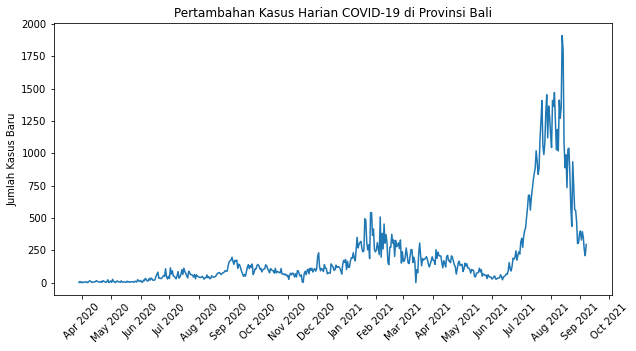

In [ ]:
# Import modules matplotlib.pyplot dan matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot grafik penambahan kasus harian COVID-19 di Provinsi Bali
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(c19_bali_new['tanggal'], c19_bali_new['kasus'])
ax.set_title('Pertambahan Kasus Harian COVID-19 di Provinsi Bali')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus Baru')
ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

Dapat dilihat bahwa terjadi kelonjakan kasus baru pada bulan Agustus 2021. Hal ini disebabkan karena adanya varian baru COVID-19 yaitu varian Delta, selain itu peningkatan juga terjadi karena menurunnya level PPKM di Bali pada Bulan Agustus sehingga mobilisasi masyarakat menjadi meningkat.

Selanjutnya akan dilihat grafik pertumbuhan jumlah kesembuhan dan meninggal sejauh ini.

<Figure size 432x288 with 0 Axes>

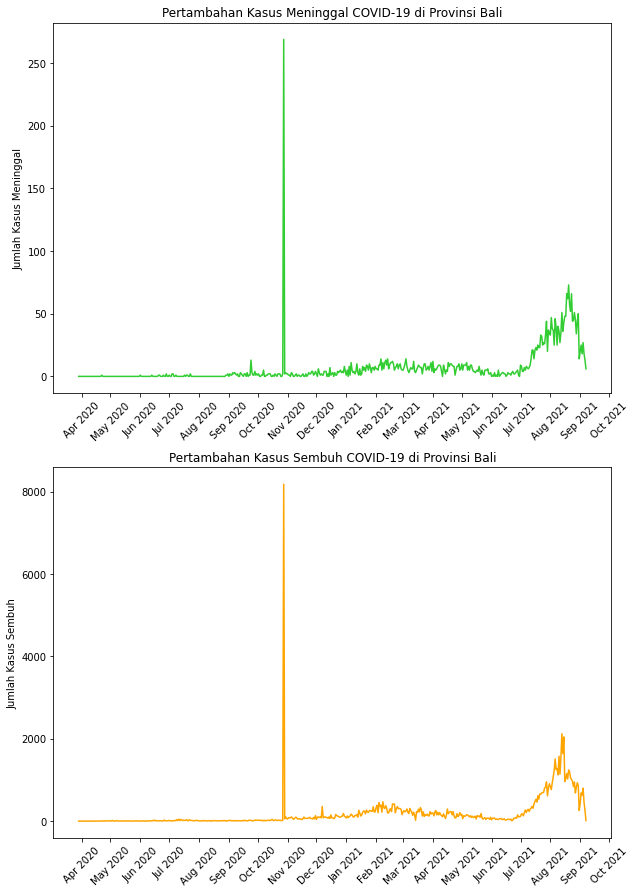

In [ ]:
# Plot grafik penambahan kasus sembuh harian dan kasus meninggal harian COVID-19 di Provinsi Bali
plt.clf()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
ax[0].plot(c19_bali_new['tanggal'], c19_bali_new['meninggal'], color='limegreen')
ax[1].plot(c19_bali_new['tanggal'], c19_bali_new['sembuh'], color='orange')
ax[0].set_title('Pertambahan Kasus Meninggal COVID-19 di Provinsi Bali')
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah Kasus Meninggal')
ax[1].set_title('Pertambahan Kasus Sembuh COVID-19 di Provinsi Bali')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah Kasus Sembuh')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=45)
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

Dapat dilihat bahwa terjadi peningkatan secara signifikan terjadi pada bulan November 2020 baik dari segi kasus sembuh maupun meninggal. Selanjutnya kita ingin mengetahui trend akumulasi pertumbuhan kasus baru, kasus sembuh, dan kasus meninggal.

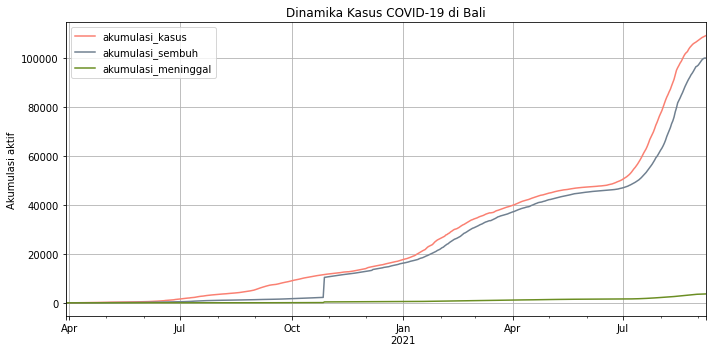

In [ ]:
# Filter data agar hanya berisi data akumulasi
c19_bali_akumulasi=c19_bali_new.drop(c19_bali_new.iloc[:,1:4], axis=1)
#Set kolom tanggal sebagai index pada DataFrame
c19_bali_akumulasi=c19_bali_akumulasi.set_index('tanggal')
#Plot grafik akumulasi kasus, sembuh, dan meninggal pada kasus COVID-19 di Provinsi Bali
c19_bali_akumulasi.plot(kind='line', color=['salmon', 'slategrey', 'olivedrab'], figsize=(10,5))
plt.title('Dinamika Kasus COVID-19 di Bali')
plt.xlabel('')
plt.ylabel('Akumulasi aktif')
plt.grid()
plt.tight_layout()
plt.show()

Dapat dilihat bahwa trend **akumulasi_kasus_meningkat** secara signifikan dan juga berbanding lurus dengan peningkatan dari **akumulasi_sembuh**. Sedangkan untuk kasus **akumulasi_meninggal** hanya mengalami peningkatan yang cukup kecil jika dibandingkan kedua kasus lainnya bahkan peningkatan yang terjadi cenderung landai. Hal ini menunjukkan bahwa kasus COVID-19 di Bali dapat diatasi dengan baik. Meskipun penambahan kasus COVID-19 naik namun hal ini juga dibarengi dengan meningkatnya kasus sembuh dan juga tidak naiknya kasus meninggal yang berarti pemerintah Bali mampu mempersiapkan dan mengatasi lonjakan kasus COVID-19 dengan baik.